In [1]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py


from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(256, kernel_size=(4, 4),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(128, (4, 4), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(1,1),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(64, (4, 4), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(1,1),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(32, (4, 4), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(1,1),padding='same'))
model.add(Dropout(0.25))

model.add(Conv2D(16, (4, 4), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(1,1),padding='same'))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Using TensorFlow backend.


11493376/11490434 [==============================] - 2s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/12





60000/60000 [==============================] - 2996s 50ms/step - loss: 1.5130 - acc: 0.3980 - val_loss: 0.3693 - val_acc: 0.9470
Epoch 2/12
60000/60000 [==============================] - 2939s 49ms/step - loss: 1.1324 - acc: 0.5316 - val_loss: 0.2437 - val_acc: 0.9664
Epoch 3/12
60000/60000 [==============================] - 2955s 49ms/step - loss: 1.0577 - acc: 0.5702 - val_loss: 0.2069 - val_acc: 0.9720
Epoch 4/12
60000/60000 [==============================] - 2945s 49ms/step - loss: 0.9408 - acc: 0.6173 - val_loss: 0.2720 - val_acc: 0.9573
Epoch 5/12
60000/60000 [====

In [ ]:
# history=model.fit(x_train, y_train,
#           batch_size=batch_size,
#           epochs=epochs,
#           verbose=1,
#           validation_data=(x_test, y_test))

# vy = history.history['val_loss']
# ty = history.history['loss']

#### Error Plots for 5 Layer CNN on MNIST

<IPython.core.display.Javascript object>


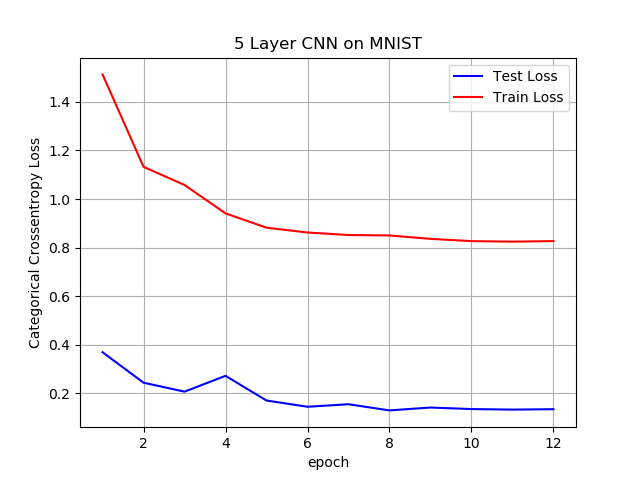

In [2]:
epochs=12
x = list(range(1,epochs+1))
ty=[1.5130,1.1324,1.0577,0.9408,0.8819,0.8621,0.8517,0.8499,0.8360,0.8266,0.8245,0.8267]
vy=[0.3693,0.2437,0.2069,0.2720,0.1703,0.1447,0.1551,0.1297,0.1415,0.1352,0.1330,0.1346]

%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time

def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Test Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; 
ax.set_ylabel('Categorical Crossentropy Loss')
ax.set_title(label="5 Layer CNN on MNIST")
plt_dynamic(x, vy, ty, ax)